# NLP for content based

## data preprocessing

In [53]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('../raw_data/rawg_games.csv')

In [36]:
list(df)

['game_id',
 'slug',
 'name',
 'description',
 'released',
 'rating',
 'detail_ratings',
 'ratings_count',
 'suggestions_count',
 'game_series_count',
 'reviews_count',
 'metacritic',
 'game_platforms',
 'game_genres',
 'game_tags',
 'developers',
 'publishers']

In [37]:
df.head(20)

,game_id,slug,name,description,released,rating,detail_ratings,ratings_count,suggestions_count,game_series_count,reviews_count,metacritic,game_platforms,game_genres,game_tags,developers,publishers
0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
2,264830,twinfold,Twinfold,<p>Twinfold delves into the duplicity of dupli...,2018-12-05,0.0,5|exceptional|2|100.0,1,101,0,2,NaN,"21|Android, 3|iOS, 4|PC, 5|macOS","Strategy, Indie, Puzzle","Singleplayer, Steam Achievements",2241|Kenny Sun,1904|Kenny Sun
3,58443,pocket-run-pool,Pocket-Run Pool,<p>The return of arcade pool from the creator ...,2018-05-24,0.0,4|recommended|1|100.0,1,38,0,1,NaN,3|iOS,Board Games,Singleplayer,179|Zach Gage,112|Zach Gage
4,51288,cinco-paus,Cinco Paus,Tens cinco varinhas mágicas mas não sabes o qu...,2017-12-25,0.0,NaN,0,44,0,0,NaN,3|iOS,"Adventure, Strategy",NaN,638|Michael Brough,488|Michael Brough
5,21889,desert-fox-the-battle-of-el-alamein,Desert Fox: The Battle of El Alamein,History and turn-based strategy collide in Des...,2014-06-26,0.0,4|recommended|1|100.0,1,181,0,1,NaN,3|iOS,"Strategy, Board Games","War, achievements, battle, online, Tanks, frie...",8795|Shenandoah Studio,9939|Shenandoah Studio
6,1190,imbroglio,Imbroglio,<strong>Imbroglio</strong> is a carefully craf...,2016-05-18,0.0,4|recommended|1|100.0,1,86,0,1,NaN,"4|PC, 3|iOS","Adventure, Strategy, Casual, Indie","Singleplayer, Full controller support","638|Michael Brough, 149959|Rostislav Pogosian","488|Michael Brough, 39838|Rostialav Pogosian"
7,1175,lost-frontier,Lost Frontier,"Welcome to the Outlands, Partner.<br/>\n<br/>\...",2016-06-02,0.0,"5|exceptional|1|50.0, 4|recommended|1|50.0",2,270,0,2,NaN,"21|Android, 5|macOS, 4|PC, 3|iOS","Strategy, Indie, Puzzle","Singleplayer, Steam Achievements, Steam Cloud,...",23963|Mika Mobile,81|Mika Mobile
8,326668,p1-select,P1 Select,<p>New mini roguelike &quot;broughlike&quot; g...,2019-06-09,0.0,5|exceptional|1|100.0,0,8,0,1,NaN,"3|iOS, 4|PC","Strategy, Puzzle",Roguelike,"638|Michael Brough, 35262|smestorp",488|Michael Brough
9,311050,twelvesmith,Twelvesmith,<p>An addictive number merging puzzle to chall...,2019-04-18,0.0,NaN,0,30,0,0,NaN,3|iOS,"Strategy, Puzzle","numbers, match-grouping",5069|FlippFly,10342|Flippfly


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            17695 non-null  int64  
 1   slug               17695 non-null  object 
 2   name               17695 non-null  object 
 3   description        17601 non-null  object 
 4   released           17000 non-null  object 
 5   rating             17695 non-null  float64
 6   detail_ratings     14926 non-null  object 
 7   ratings_count      17695 non-null  int64  
 8   suggestions_count  17695 non-null  int64  
 9   game_series_count  17695 non-null  int64  
 10  reviews_count      17695 non-null  int64  
 11  metacritic         3830 non-null   float64
 12  game_platforms     17693 non-null  object 
 13  game_genres        17263 non-null  object 
 14  game_tags          17155 non-null  object 
 15  developers         17458 non-null  object 
 16  publishers         171

In [39]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def replace_slash(text):
    punctuations = string.punctuation.replace("|", "")+'•'
    for punctuation in punctuations:
        text = text.replace(punctuation, ' ')
    text = text.replace('br', '')
    return text.lower()

In [40]:
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer([
#                                 ('replace_slash', replace_slash, ['slug']),
#                                 ('replace_comma', replace_comma, ['game_genres',
#                                                                   'game_tags',
#                                                                   'description',
#                                                                   'developers',
#                                                                   'publishers'])])

In [41]:
df["slug"] = df["slug"].astype(str)
df["game_genres"] = df["game_genres"].astype(str)
df["game_tags"] = df["game_tags"].astype(str)
df["description"] = df["description"].astype(str)
df["developers"] = df["developers"].astype(str)
df["publishers"] = df["publishers"].astype(str)

In [42]:
# df['metadata'] = df[['slug',
#                      'game_genres',
#                      'game_tags',
#                      'description',
#                      'developers',
#                      'publishers']].apply(lambda x: ' '.join(x, axis = 1)

In [43]:
df['metadata']=df["slug"]+' '+df["game_genres"]+' '+df["game_tags"]+' '+df["description"]+' '+df["developers"]+' '+df["publishers"]

In [67]:
df['metadata']

0        high rise a puzzle cityscape casual  puzzle sp...
1        high rise a puzzle cityscape casual  puzzle sp...
2        twinfold strategy  indie  puzzle singleplayer ...
3        pocket run pool board games singleplayer  p th...
4        cinco paus adventure  strategy nan tens cinco ...
                               ...                        
17690    gocco of war action  casual  indie singleplaye...
17691    conquest of elysium 4 strategy  indie singlepl...
17692    dominions 5 warriors of the faith strategy  in...
17693    red faction battlegrounds action  shooter  arc...
17694    super stardust ultra nan exclusive  true exclu...
Name: metadata, Length: 17695, dtype: object

In [45]:
df['metadata']=df['metadata'].apply(lambda x: replace_slash(x))

In [54]:
df['metadata'][0]

'high rise a puzzle cityscape casual  puzzle space  city  friends  fun  match  cubes high rise is a innovative take on the match 3 genre  a relaxed casual puzzle experience  match colourful cubes and watch them merge  grow and your 3d puzzle cityscape rise       the game is complete in its free version but will show you ads occasionally  those who prefer an add free experience can remove them with the cheapest possible in app purchase and also support us updating this game and creating new ones    no hidden costs or cheap tricks        easily rotate your 3d city with a swipe of your finger  place cubes with a tab and let them merge and grow higher  and higher  and higher       simple and engaging gameplay that is easy to learn but leaves a lot of space for your own tactics and personal improvement         innovative but easy gameplay     simple and fun mechanics     a relaxed puzzle experience     see your colorful city grow     compare your city score with your friends and the whole w

# key word countverctorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05)

meta_tf = tf_idf_vectorizer.fit_transform(df['metadata'])

In [84]:
meta_df=pd.DataFrame(meta_tf.toarray(), index=df.game_id.tolist())

In [85]:
dict_word = tf_idf_vectorizer.vocabulary_

In [86]:
df_word = pd.DataFrame(index=dict_word.keys())

In [87]:
df_word['count']=dict_word.values()

In [88]:
df_word.sort_values('count', ascending=False)

,count
years,324
worlds,323
world,322
work,321
weapons,320
...,...
3d,4
39,3
2d,2
100,1


In [101]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=300)
trained = svd.fit(meta_df)
latent_df = svd.fit_transform(meta_df)

In [ ]:
import pickle
with open('testtrainer.pickle', 'wb') as f:
    pickle.dump(tt, f)

In [102]:
latent_df

array([[ 0.13915635,  0.2087255 , -0.05114401, ...,  0.03088721,
        -0.02049273, -0.04176325],
       [ 0.13915635,  0.2087255 , -0.05114401, ...,  0.03088721,
        -0.02049273, -0.04176325],
       [ 0.15487558,  0.21051987, -0.05227015, ..., -0.00355617,
         0.05638519,  0.03427361],
       ...,
       [ 0.21847548,  0.35756174, -0.11456948, ...,  0.01458278,
         0.0548991 ,  0.09078292],
       [ 0.13701997,  0.23352478, -0.08560875, ..., -0.00341364,
        -0.01983173, -0.04817192],
       [ 0.10596628,  0.22352768, -0.10307091, ..., -0.00759153,
         0.02634597, -0.0032243 ]])

In [91]:
latent_df.min(), latent_df.max()

(-0.4984411225633045, 0.929802569198708)

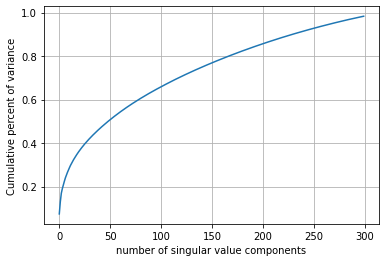

In [92]:
import matplotlib.pyplot as plt
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [93]:
# from sklearn.feature_extraction.text import CountVectorizer
# count1 = CountVectorizer(stop_words='english', min_df = 0.05)
# count_matrix1 = count1.fit_transform(df['metadata'])
# count_df1 = pd.DataFrame(count_matrix1.toarray(), index=df.index.tolist())
# count_df1.head()

In [94]:
# # Apply SVD
# svd1 = TruncatedSVD(n_components=200)
# latent_df1 = svd1.fit_transform(count_df1)

In [95]:
# latent_df1

In [96]:
# latent_df1.min(), latent_df1.max()

In [97]:
# Plot variance as a function of the number of components.
# plt.plot(svd1.explained_variance_ratio_.cumsum())
# plt.xlabel('number of singular value components')
# plt.ylabel('Cumulative percent of variance')   
# plt.grid()
# plt.show()

In [103]:
n = 200 
latent_df_t = pd.DataFrame(latent_df[:,0:n], index=df.game_id.tolist())
latent_df_t

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
446900,0.139156,0.208725,-0.051144,-0.096204,0.091955,0.008424,-0.128341,-0.142022,-0.191749,-0.046438,...,0.014960,0.037754,-0.038275,0.032598,0.008038,-0.021748,0.000192,-0.041754,-0.020346,-0.028599
446900,0.139156,0.208725,-0.051144,-0.096204,0.091955,0.008424,-0.128341,-0.142022,-0.191749,-0.046438,...,0.014960,0.037754,-0.038275,0.032598,0.008038,-0.021748,0.000192,-0.041754,-0.020346,-0.028599
264830,0.154876,0.210520,-0.052270,-0.115695,-0.021553,0.089238,-0.122241,0.098625,-0.178500,-0.126680,...,-0.101438,-0.009983,-0.001650,-0.012635,0.025043,0.019811,0.037643,-0.021372,0.010369,-0.049290
58443,0.612110,-0.183584,-0.138396,0.089811,0.016167,0.061088,0.003311,-0.074251,-0.023650,0.000971,...,0.081440,0.050150,-0.006355,0.014681,0.020257,-0.008940,0.100433,-0.023672,0.024384,-0.024168
51288,0.067829,0.127977,-0.062912,0.055617,0.261656,-0.083805,0.026376,0.189931,-0.075462,0.023062,...,-0.003075,-0.010994,0.009365,0.010205,0.031481,-0.033908,0.039154,0.012774,0.012105,-0.004290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,0.799846,-0.219664,-0.168184,0.053365,-0.098063,-0.010236,-0.015625,-0.004911,0.042486,0.022459,...,0.002663,0.034185,-0.011478,-0.010021,-0.015717,0.009197,0.071922,0.035366,0.015636,-0.020729
15836,0.209931,0.319451,-0.085939,0.093580,-0.101422,-0.037689,0.061035,0.131928,-0.308412,-0.097458,...,0.002118,-0.030558,-0.043375,-0.030316,0.113515,0.023607,-0.004338,-0.023999,0.016487,0.029070
49840,0.218475,0.357562,-0.114569,0.234943,-0.143999,-0.054534,0.032535,0.141058,-0.209437,-0.094497,...,0.002056,-0.036621,0.004507,-0.010106,-0.071367,0.012091,-0.079120,0.008754,0.024223,0.042162
4735,0.137020,0.233525,-0.085609,0.306054,-0.020961,-0.146237,-0.145125,-0.163218,0.135298,-0.134667,...,-0.027488,-0.028889,0.003783,-0.004904,-0.031784,0.041272,0.017072,0.000572,0.062137,-0.004450


In [71]:
# n = 200 
# latent_df1 = pd.DataFrame(latent_df1[:,0:n], index=df.name.tolist())
# latent_df1.shape

(17695, 200)

# similarity ranking of given game

## similarity with TF

In [104]:
from sklearn.metrics.pairwise import cosine_similarity

In [108]:
v1 = np.array(latent_df_t.loc[3436]).reshape(1, -1)

In [110]:
sim1 = cosine_similarity(latent_df_t, v1).reshape(-1)

In [76]:
sim1

array([ 0.00711703,  0.00711703,  0.02078424, ...,  0.07495101,
       -0.0034395 ,  0.40067577])

In [111]:
dictDf = {'content': sim1} 
recommendation_df = pd.DataFrame(dictDf, index = latent_df_t.index)

In [117]:
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10).reset_index()

,index,content
0,3436,1.000000
1,3373,0.673058
2,1159,0.666634
3,3305,0.648094
4,3624,0.624779
5,4472,0.621802
6,57956,0.619731
7,46422,0.618202
8,3924,0.614170
9,5356,0.613953


In [120]:
recommendation_df.head(10).reset_index().to_dict()

{'index': {0: 3436,
  1: 3373,
  2: 1159,
  3: 3305,
  4: 3624,
  5: 4472,
  6: 57956,
  7: 46422,
  8: 3924,
  9: 5356},
 'content': {0: 0.9999999999999998,
  1: 0.6730577041684472,
  2: 0.666634103564075,
  3: 0.6480939462291508,
  4: 0.6247794844722533,
  5: 0.6218021073268891,
  6: 0.6197311417504441,
  7: 0.6182021399937688,
  8: 0.6141695485972716,
  9: 0.6139528878939942}}

In [84]:
def fit_value(game_name):
    tmp_= df[df['name'] == 'Pokémon Platinum']
    genres = tmp_['game_genres']
    tags = tmp_['game_tags']
    return genres, tags

In [88]:
recommendation_df[['genres', 'tags']] = recommendation_df.index.map(lambda x: fit_value(x))

TypeError: 'Series' objects are mutable, thus they cannot be hashed

## Similarity with CV

In [79]:
v2 = np.array(latent_df1.loc['Pokémon Platinum']).reshape(1, -1)
sim2 = cosine_similarity(latent_df1, v2).reshape(-1)

dictDf2 = {'content': sim2} 
recommendation_df2 = pd.DataFrame(dictDf2, index = latent_df1.index)

recommendation_df2.sort_values('content', ascending=False, inplace=True)
recommendation_df2.head(10)

,content
Pokémon Platinum,1.000000
"Pokémon Diamond, Pearl",0.937204
The Legend of Zelda: Link's Awakening (2019),0.841003
Super Robot Wars J,0.794038
Road Rash 3,0.754169
"Pokémon Sword, Shield",0.752383
Mario Kart Wii,0.710928
Super Robot Wars 64,0.673148
Final Fantasy Tactics A2: Grimoire of the Rift,0.672732
Infinite Undiscovery,0.667896


# test of the creation of class

## class of get meta data

In [220]:
class GetMetadata(object):
    def __init__(self,columns):
        self.columns = columns
        self.df = None

    def get_games(self):
        self.df = pd.read_csv('../raw_data/rawg_games.csv')
#         return self.df.head(1)

    def stringfy_columns(self):
#         print(self.columns)
        for column in self.columns:
            self.df[column] = self.df[column].astype(str)
#             print(type(self.df[column][0]))
#             print(self.df[column][0])

    def merge_metadata(self):
        self.df['metadata'] = ''
        for column in self.columns:
#             print(type(self.df[column][0]))
            self.df['metadata'] += (self.df[column] + ' ')
#         print(self.df['metadata'][0])
#         print(type(self.df['metadata'][0]))
        

    def replace_punctuations(self, text):
        punctuations = string.punctuation.replace("|", "")+'•'
        for punctuation in punctuations:
            text = text.replace(punctuation, ' ')
        text = text.replace('br', '')
        return text.lower()

    def create_metadata(self):
        self.get_games()
        self.stringfy_columns()
        self.merge_metadata()
#         print(self.df['metadata'][0])
        self.df['metadata'] = self.df['metadata'].apply(lambda x: self.replace_punctuations(x))
        return self.df['metadata']

In [221]:
COLUMNS = ['developers',
           'publishers']
get_metadata = GetMetadata(COLUMNS)
meta = get_metadata.create_metadata()

In [222]:
meta

0              181849|florian grolig 42334|florian grolig 
1              181849|florian grolig 42334|florian grolig 
2                           2241|kenny sun 1904|kenny sun 
3                             179|zach gage 112|zach gage 
4                   638|michael brough 488|michael brough 
                               ...                        
17690          13671|o two  4352|peakvox 3777|agm playism 
17691    7602|illwinter game design 6383|illwinter game...
17692    7602|illwinter game design 6383|illwinter game...
17693    84|thq nordic  14787|thq  19009|thq digital wa...
17694                6|sony interactive entertainment nan 
Name: metadata, Length: 17695, dtype: object

In [130]:
# print(pd.read_csv('../raw_data/rawg_games.csv').head(5))

In [226]:
from sklearn.feature_extraction.text import CountVectorizer
count1 = CountVectorizer(stop_words='english', min_df = 0.05)
count_matrix1 = count1.fit_transform(meta)
count_df1 = pd.DataFrame(count_matrix1.toarray(), index=df.index.tolist())
count_df1.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [69]:
class TestTrainer:
    
    def __init__(self):
        self.tf_idf = None
        self.svd =None
    
    def fit_tf_idf(self):
        self.tf_idf = 6
    
    def fit_svd(self):
        self.svd = 4
        

    
tt = TestTrainer()

In [73]:
tt.fit_svd()
tt.fit_tf_idf()

In [76]:
import pickle

In [77]:
import pickle
with open('testtrainer.pickle', 'wb') as f:
    pickle.dump(tt, f)

In [78]:
with open('content_base_svd.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [81]:
loaded_model.tf_idf

6